# Permutation significance test

In [14]:
import numpy as np
import joblib
from sklearn.model_selection import permutation_test_score

In [5]:
model_median = joblib.load('../results/gbm/regressor_medianrun_2020_06_08_12_59_1591613951.joblib')

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
X_train = np.load('../results/gbm/X_train_run_2020_06_08_12_59_1591613951.npy')

In [9]:
y_train = np.load('../results/gbm/y_train_run_2020_06_08_12_59_1591613951.npy')

In [12]:
from colorml.utils.utils import pairwise_delta_es

Using TensorFlow backend.


In [26]:
from sklearn.metrics import make_scorer, r2_score
score = make_scorer(pairwise_delta_es, greater_is_better=False)

In [ ]:
score, permutation_scores, pvalue = permutation_test_score(
    model_median, X_train[:500], y_train[:500], scoring=make_scorer(r2_score), cv=5, n_permutations=100, n_jobs=-1)

In [35]:
score

0.27185459791411476

In [45]:
pvalue

0.009900990099009901

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]


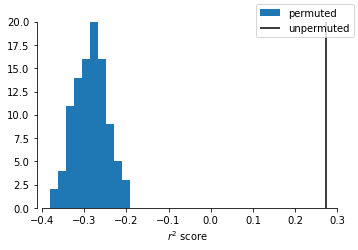

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,3.5))


ax.hist(permutation_scores, label='permuted')
ax.vlines(score, 0,20, label='unpermuted')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)


ax.set_xlabel(r'$r^2$ score')

fig.legend()
fig.tight_layout()

fig.savefig('../results/permutation_test_500.pdf', bbox_inches='tight')